In [1]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon
import seaborn as sns
from sklearn.decomposition import PCA

from script.helpers import get_data

In [2]:
X, holds, _ = get_data(dates=['0423'])

In [3]:
pca = PCA(n_components=1)
pca.fit(X[holds != 'idle'])
X['PCA1'] = pca.transform(X)

array([[<Axes: title={'center': 'crimp_20mm'}>,
        <Axes: title={'center': 'crimp_45mm'}>],
       [<Axes: title={'center': 'idle'}>,
        <Axes: title={'center': 'jug'}>],
       [<Axes: title={'center': 'sloper_35deg'}>, <Axes: >]], dtype=object)

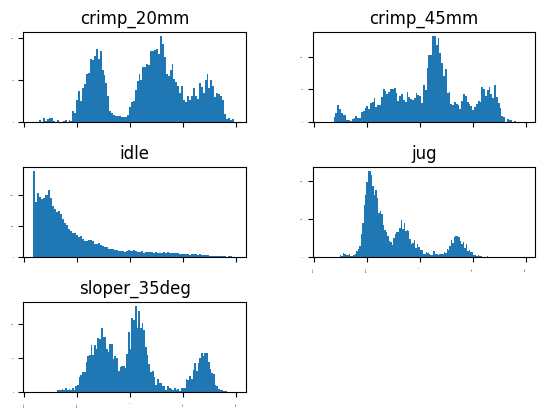

In [4]:
X.PCA1.hist(by=holds, bins=100, xlabelsize=0, ylabelsize=0, sharex=True)

In [5]:
hold_types = pd.Categorical(holds).categories
results = np.ones((len(hold_types), len(hold_types)))
for i, hold1 in enumerate(hold_types):
    for j, hold2 in enumerate(hold_types):
        if hold1 == hold2: continue
        x1 = X.PCA1[holds == hold1]
        x2 = X.PCA1[holds == hold2]
        n = min(len(x1), len(x2))
        results[i, j] = wilcoxon(x1[:n], x2[:n]).pvalue

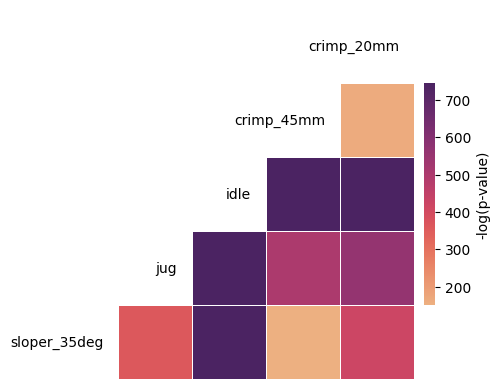

In [6]:
up_triang = np.triu(np.ones_like(results)).astype(bool)
ax = sns.heatmap(
    -np.log(results + np.nextafter(0, 1)),
    cmap='flare', xticklabels=False, yticklabels=False,
    square=True, linecolor='white', linewidths=0.5,
    cbar=True, mask=up_triang, cbar_kws={'shrink': 0.6, 'pad': 0.02, 'label': '-log(p-value)'}
)
ax.invert_xaxis()
for i, label in enumerate(hold_types):
    ax.text(i + 0.2, i + 0.5, label, ha='right', va='center')